## Avaliações qualitativas dos modelos vetoriais - Matriz de similaridade semântica


In [1]:
%matplotlib inline

In [2]:
import os
from pathlib import Path
import datetime
from os.path import isfile, join, isdir
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import seaborn as sns

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

In [5]:
pastaArquivosModelos = join('..', '..', 'resources', 'Modelos')
%run ./_EvaluationUtil.ipynb

In [6]:
modelo = carregaModelo('publico-COMPLETO.txt.model')

## Gráficos

In [9]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set(font_scale = 1.1)

def heatmap(modelo, nome):
    termos_x = termos*len(termos)
    termos_y = []
    for x in termos:
        for i in range(len(termos)):
            termos_y.append(x)

    valores = []
    for i in range(len(termos_x)):
        valores.append( round(modelo.wv.similarity(termos_x[i],termos_y[i]),1) )

    dataset = {'x': termos_x,
               'y': termos_y,
               'valores': valores}

    terms_df = pd.DataFrame(dataset)
    df = terms_df.pivot_table(index='x', columns='y', values='valores')
    df = df.reindex(index=termos, columns=termos)

    plot = sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.4)
    plot.set(xlabel='', ylabel='')
    plt.title(nome, fontsize = 20)
    plt.show()
    return df

In [7]:
termos = ['folhelho', 'arenito', 'argila', 'calcarenito', 'evaporito', # Geologia
          'combustivel', 'diesel', 'gasolina', 'glp', 'querosene', # Derivados de petroleo
          'sismica', 'acustica', 'reflexao', 'amplitude', 'espectral', # Geofisica
          'anm', 'choke', 'pig', 'riser', 'duto']  # Equipamentos de perfuracao e producao

In [8]:
df = heatmap(modelo, "")

NameError: name 'heatmap' is not defined

In [12]:
## Opcao II, mais completa
termos = ['anidrita', 'evaporito', 'calcarenito', 'argila', 'arenito', 'folhelho', # Geologia
          'valvula', 'duto', 'riser', 'pig', 'choke', 'anm',  # Equipamentos de perfuracao e producao
          'eletromagnetica', 'espectral', 'amplitude', 'reflexao', 'acustica', 'sismica',    # Geofisica
          'nafta', 'querosene', 'glp', 'gasolina', 'diesel', 'combustivel',      # Derivados de petroleo
          ] 

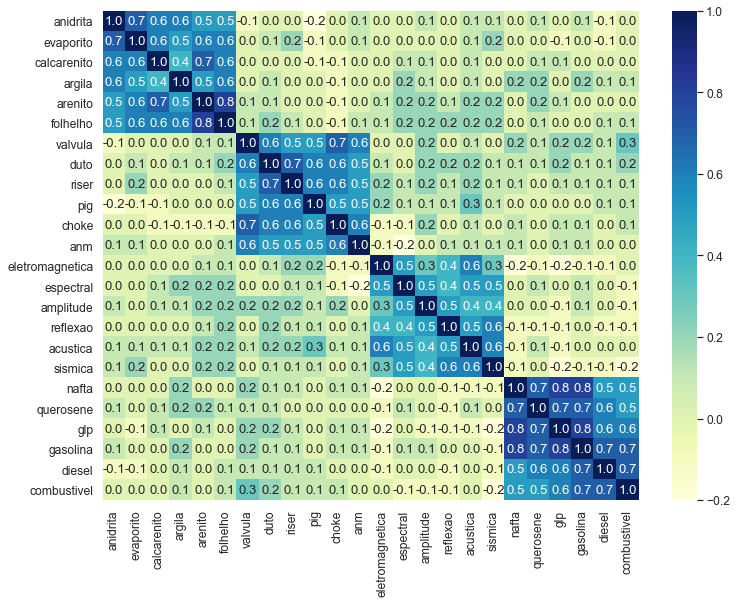

In [13]:
df = heatmap(modelo, "")

In [94]:
modelo.wv.most_similar('espectral')

[('espectrais', 0.6844415068626404),
 ('espectro', 0.670452356338501),
 ('frequencial', 0.6433242559432983),
 ('fotoluminescencia', 0.6139134168624878),
 ('espectros', 0.6030662059783936),
 ('refletancia', 0.5763899683952332),
 ('raman', 0.5618690252304077),
 ('fourier', 0.5610449910163879),
 ('transmitancia', 0.561002790927887),
 ('nir', 0.5491690635681152)]

In [172]:
### Persistindo o DataFrame em disco
df.to_csv('_Dataframe-MatrizSimilaridades.csv')

In [95]:
### Persistindo o DataFrame em disco
df.to_csv('_Dataframe-MatrizSimilaridades-Maior.csv')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
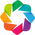

In [6]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
import numpy as np
hv.extension('bokeh')

In [10]:
## Neste ponto, é preciso alternar para o conda environment do holoviews, importando novamente os dados do CSV, uma vez que a biblioteca holoviews não é compatível com as demais bibliotecas mais recentes
# conda activate chord
#dados = pd.read_csv('_Dataframe-MatrizSimilaridades.csv')
dados = pd.read_csv('_Dataframe-MatrizSimilaridades-Maior.csv')

In [11]:
### Definindo os nodes


#Quantidade de termos
n_termos = 6 #5

n_groups = [0,1,2,3]
groups = [item for item in n_groups for i in range(n_termos)]
print(groups)

data = {'index': range(0, len(termos)),
        'name': termos,
        'group': groups}


df_nodes = pd.DataFrame (data, columns = ['index','name', 'group'])
df_nodes
nodes = hv.Dataset(df_nodes, 'index')
nodes.data

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]


,index,name,group
0,0,folhelho,0
1,1,arenito,0
2,2,argila,0
3,3,calcarenito,0
4,4,evaporito,0
5,5,anidrita,0
6,6,combustivel,1
7,7,diesel,1
8,8,gasolina,1
9,9,glp,1


In [12]:
## Montando os links, com os valores apurados na correlacao entre cada node
df_links = []

for i in range(0, len(termos)):
    for j in range(0, len(termos)):
        value = dados[termos[i]][j]
        d = {
            'source' : i,  # some formula for obtaining values
            'target' : j,
            'value' : value
        }
        #if i<j and value >= 0.3:
        if i!=j and value >= 0.25:
            df_links.append(d)
            
        
        
df_links = pd.DataFrame(df_links)
df_links

,source,target,value
0,0,1,0.8
1,0,2,0.6
2,0,3,0.6
3,0,4,0.6
4,0,5,0.5
...,...,...,...
119,23,18,0.6
120,23,19,0.7
121,23,20,0.5
122,23,21,0.5


In [10]:
hv.output(size=300)
chord = hv.Chord((df_links, nodes))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', 
               #title="Chord",
               #height = 300, width = 300,
               label_text_font_size='15pt',
               edge_color=dim('source').str(), 
               labels='name', node_color=dim('group').str()))

:Chord   [source,target]   (value)